In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm

In [8]:
# train_df= pd.read_csv('data/train-data.csv')
# train_df
data=pd.read_csv('data/train-data.csv')
data


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [10]:
# train=pd.DataFrame(data)
# train.columns=['Year','Kilometers_Driven','Mileage','Engine','Power','New_Price']
# train['MEDV']=target
# train
data1=data.loc[:,['Name','Year','Kilometers_Driven','Mileage','Engine','Price','New_Price']]
data1

,Name,Year,Kilometers_Driven,Mileage,Engine,Price,New_Price
0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998 CC,1.75,NaN
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582 CC,12.50,NaN
2,Honda Jazz V,2011,46000,18.2 kmpl,1199 CC,4.50,8.61 Lakh
3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248 CC,6.00,NaN
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968 CC,17.74,NaN
...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,28.4 kmpl,1248 CC,4.75,7.88 Lakh
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,24.4 kmpl,1120 CC,4.00,NaN
6016,Mahindra Xylo D4 BSIV,2012,55000,14.0 kmpl,2498 CC,2.90,NaN
6017,Maruti Wagon R VXI,2013,46000,18.9 kmpl,998 CC,2.65,NaN


In [11]:
data1.New_Price=data1.New_Price.fillna('0')
data1

,Name,Year,Kilometers_Driven,Mileage,Engine,Price,New_Price
0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998 CC,1.75,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582 CC,12.50,0
2,Honda Jazz V,2011,46000,18.2 kmpl,1199 CC,4.50,8.61 Lakh
3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248 CC,6.00,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968 CC,17.74,0
...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,28.4 kmpl,1248 CC,4.75,7.88 Lakh
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,24.4 kmpl,1120 CC,4.00,0
6016,Mahindra Xylo D4 BSIV,2012,55000,14.0 kmpl,2498 CC,2.90,0
6017,Maruti Wagon R VXI,2013,46000,18.9 kmpl,998 CC,2.65,0


In [13]:
new_price=list(data1.New_Price)
print(new_price)
price=list(data1.Price)
print(price)

['0', '0', '8.61 Lakh', '0', '0', '0', '0', '21 Lakh', '0', '0', '10.65 Lakh', '0', '0', '0', '0', '32.01 Lakh', '0', '0', '0', '0', '47.87 Lakh', '0', '0', '0', '0', '0', '0', '0', '10.57 Lakh', '0', '0', '0', '0', '0', '12.33 Lakh', '0', '11.12 Lakh', '0', '0', '0', '0', '0', '0', '0', '23.64 Lakh', '0', '0', '18.64 Lakh', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '19.34 Lakh', '0', '0', '0', '0', '0', '0', '49.14 Lakh', '0', '11.81 Lakh', '0', '0', '0', '16.65 Lakh', '0', '0', '0', '0', '0', '0', '0', '6.67 Lakh', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6.45 Lakh', '0', '0', '0', '6.41 Lakh', '0', '0', '0', '27 Lakh', '5.13 Lakh', '0', '54.43 Lakh', '0', '0', '0', '9.51 Lakh', '0', '9.96 Lakh', '0', '0', '14.44 Lakh', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1.28 Cr', '60.88 Lakh', '0', '0', '0',

In [15]:
for i in range(len(new_price)):
    if new_price[i]!='0':
        price[i]=float(str(new_price[i]).split()[0])


data1.Price=price
data1

,Name,Year,Kilometers_Driven,Mileage,Engine,Price,New_Price
0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998 CC,1.75,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582 CC,12.50,0
2,Honda Jazz V,2011,46000,18.2 kmpl,1199 CC,8.61,8.61 Lakh
3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248 CC,6.00,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968 CC,17.74,0
...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,28.4 kmpl,1248 CC,7.88,7.88 Lakh
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,24.4 kmpl,1120 CC,4.00,0
6016,Mahindra Xylo D4 BSIV,2012,55000,14.0 kmpl,2498 CC,2.90,0
6017,Maruti Wagon R VXI,2013,46000,18.9 kmpl,998 CC,2.65,0


In [16]:
data1.isna().sum()

Name                  0
Year                  0
Kilometers_Driven     0
Mileage               2
Engine               36
Price                 0
New_Price             0
dtype: int64

In [19]:
data1=data1.dropna()
data1.isna().sum()


Name                 0
Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Price                0
New_Price            0
dtype: int64

In [20]:
data1

,Name,Year,Kilometers_Driven,Mileage,Engine,Price,New_Price
0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998 CC,1.75,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582 CC,12.50,0
2,Honda Jazz V,2011,46000,18.2 kmpl,1199 CC,8.61,8.61 Lakh
3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248 CC,6.00,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968 CC,17.74,0
...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,28.4 kmpl,1248 CC,7.88,7.88 Lakh
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,24.4 kmpl,1120 CC,4.00,0
6016,Mahindra Xylo D4 BSIV,2012,55000,14.0 kmpl,2498 CC,2.90,0
6017,Maruti Wagon R VXI,2013,46000,18.9 kmpl,998 CC,2.65,0


In [21]:
names=list(data1.Name)
mileage=list(data1.Mileage)
engine=list(data1.Engine)

for i in range(len(names)):
    names[i]=names[i].split()[0]
    mileage[i]=float(mileage[i].split()[0])
    engine[i]=float(engine[i].split()[0])

data1.Name=names
data1.Engine=engine
data1.Mileage=mileage

data1

,Name,Year,Kilometers_Driven,Mileage,Engine,Price,New_Price
0,Maruti,2010,72000,26.60,998.0,1.75,0
1,Hyundai,2015,41000,19.67,1582.0,12.50,0
2,Honda,2011,46000,18.20,1199.0,8.61,8.61 Lakh
3,Maruti,2012,87000,20.77,1248.0,6.00,0
4,Audi,2013,40670,15.20,1968.0,17.74,0
...,...,...,...,...,...,...,...
6014,Maruti,2014,27365,28.40,1248.0,7.88,7.88 Lakh
6015,Hyundai,2015,100000,24.40,1120.0,4.00,0
6016,Mahindra,2012,55000,14.00,2498.0,2.90,0
6017,Maruti,2013,46000,18.90,998.0,2.65,0


In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5981 non-null   object 
 1   Year               5981 non-null   int64  
 2   Kilometers_Driven  5981 non-null   int64  
 3   Mileage            5981 non-null   float64
 4   Engine             5981 non-null   float64
 5   Price              5981 non-null   float64
 6   New_Price          5981 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 373.8+ KB


In [23]:
data1=data1.drop(columns='New_Price')
data1

,Name,Year,Kilometers_Driven,Mileage,Engine,Price
0,Maruti,2010,72000,26.60,998.0,1.75
1,Hyundai,2015,41000,19.67,1582.0,12.50
2,Honda,2011,46000,18.20,1199.0,8.61
3,Maruti,2012,87000,20.77,1248.0,6.00
4,Audi,2013,40670,15.20,1968.0,17.74
...,...,...,...,...,...,...
6014,Maruti,2014,27365,28.40,1248.0,7.88
6015,Hyundai,2015,100000,24.40,1120.0,4.00
6016,Mahindra,2012,55000,14.00,2498.0,2.90
6017,Maruti,2013,46000,18.90,998.0,2.65


1. 자동차 제조사별 count 구하라.
2. 자동차 제조사별 요약을 구하라.
3. 자동차 제조사별 중고차가격의 합, 평균을 구하라.
4. 자동차 가격을 종속변수, 년도, 운행거리, 마일리지, 엔진을 종속변수로 하여 회귀분석을 하라.
5. 초기 10개의 데이터로 예측을 하라.

In [24]:
#1. 자동차 제조사별 count 구하라.
print(data1.groupby('Name').count())

               Year  Kilometers_Driven  Mileage  Engine  Price
Name                                                          
Ambassador        1                  1        1       1      1
Audi            236                236      236     236    236
BMW             262                262      262     262    262
Bentley           1                  1        1       1      1
Chevrolet       121                121      121     121    121
Datsun           13                 13       13      13     13
Fiat             25                 25       25      25     25
Force             3                  3        3       3      3
Ford            300                300      300     300    300
Honda           602                602      602     602    602
Hyundai        1100               1100     1100    1100   1100
ISUZU             2                  2        2       2      2
Isuzu             1                  1        1       1      1
Jaguar           40                 40       40      40

In [25]:
#2. 자동차 제조사별 요약을 구하라.
print(data1.groupby('Name').describe())

                 Year                                                  \
                count         mean       std     min      25%     50%   
Name                                                                    
Ambassador        1.0  2003.000000       NaN  2003.0  2003.00  2003.0   
Audi            236.0  2013.614407  2.302553  2008.0  2012.00  2014.0   
BMW             262.0  2013.083969  2.797202  2006.0  2011.00  2013.0   
Bentley           1.0  2006.000000       NaN  2006.0  2006.00  2006.0   
Chevrolet       121.0  2011.570248  2.676523  2004.0  2010.00  2012.0   
Datsun           13.0  2016.538462  0.776250  2016.0  2016.00  2016.0   
Fiat             25.0  2011.720000  3.668787  2001.0  2010.00  2011.0   
Force             3.0  2014.000000  0.000000  2014.0  2014.00  2014.0   
Ford            300.0  2013.206667  3.519267  2002.0  2011.00  2014.0   
Honda           602.0  2013.093023  3.301487  1999.0  2011.00  2014.0   
Hyundai        1100.0  2013.530000  3.303293  2001.

In [33]:
#3. 자동차 제조사별 중고차가격의 합, 평균을 구하라.
print(data1.groupby('Name')['Price'].agg(['mean','sum']))

                     mean      sum
Name                              
Ambassador       1.350000     1.35
Audi            26.894449  6347.09
BMW             32.271641  8455.17
Bentley         59.000000    59.00
Chevrolet        3.044463   368.38
Datsun           3.770000    49.01
Fiat             3.620800    90.52
Force            9.333333    28.00
Ford             7.204333  2161.30
Honda            5.888837  3545.08
Hyundai          5.734518  6307.97
ISUZU           12.045000    24.09
Isuzu           33.680000    33.68
Jaguar          39.333250  1573.33
Jeep            23.115333   346.73
Lamborghini    120.000000   120.00
Land            33.266491  1896.19
Mahindra         8.436531  2286.30
Maruti           4.868683  5842.42
Mercedes-Benz   28.753428  9143.59
Mini            34.807692   905.00
Mitsubishi      14.944444   403.50
Nissan           5.792637   527.13
Porsche         48.311667   869.61
Renault          6.178828   895.93
Skoda            8.964566  1550.87
Smart            3.0

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


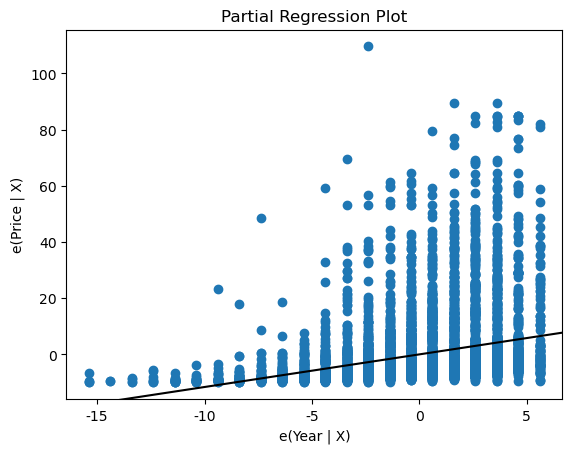

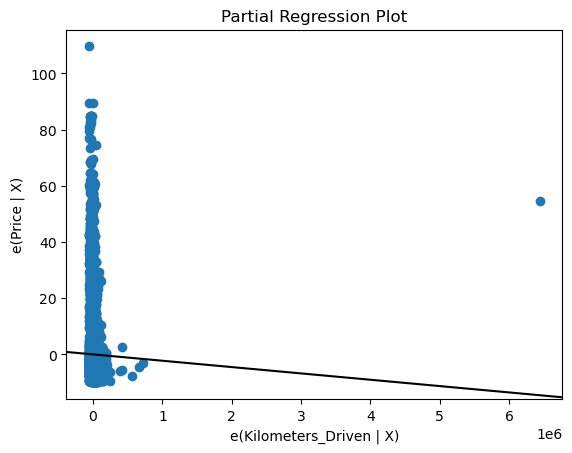

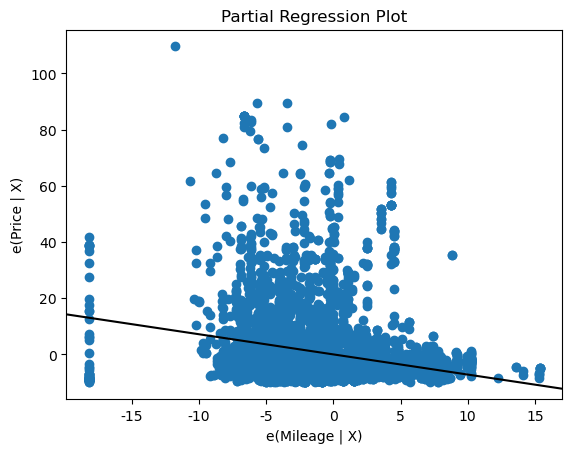

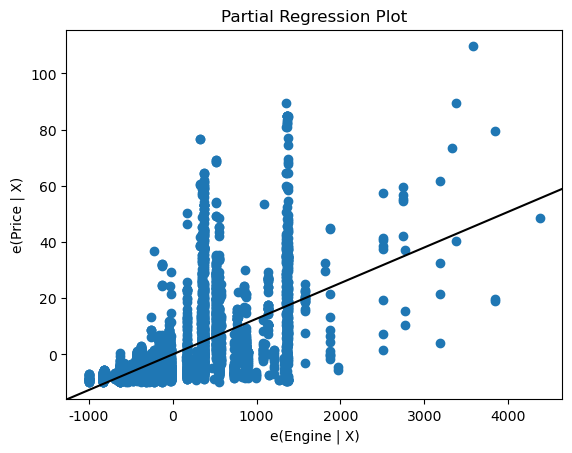

In [38]:
#4. 자동차 가격을 종속변수, 년도, 운행거리, 마일리지, 엔진을 독립변수로 하여 회귀분석을 하라.
dependent_variable = 'Price'
independent_variables = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine']

other_columns = list(set(data1.columns).difference(set([dependent_variable] + independent_variables)))

for independent_variable in independent_variables:
 p, resids = sm.graphics.plot_partregress(
        dependent_variable, independent_variable, other_columns,
        data=data1, obs_labels=False, ret_coords=True
    )
plt.show()


In [42]:
others=list(set(data1.columns).difference(set(['Year', 'Kilometers_Driven', 'Mileage', 'Engine'])))
p, resids=sm.graphics.plot_partregress('Price', others, data=data1, 
                                       obs_labels=False,ret_coords=True)
plt.show()


TypeError: plot_partregress() missing 1 required positional argument: 'exog_others'

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


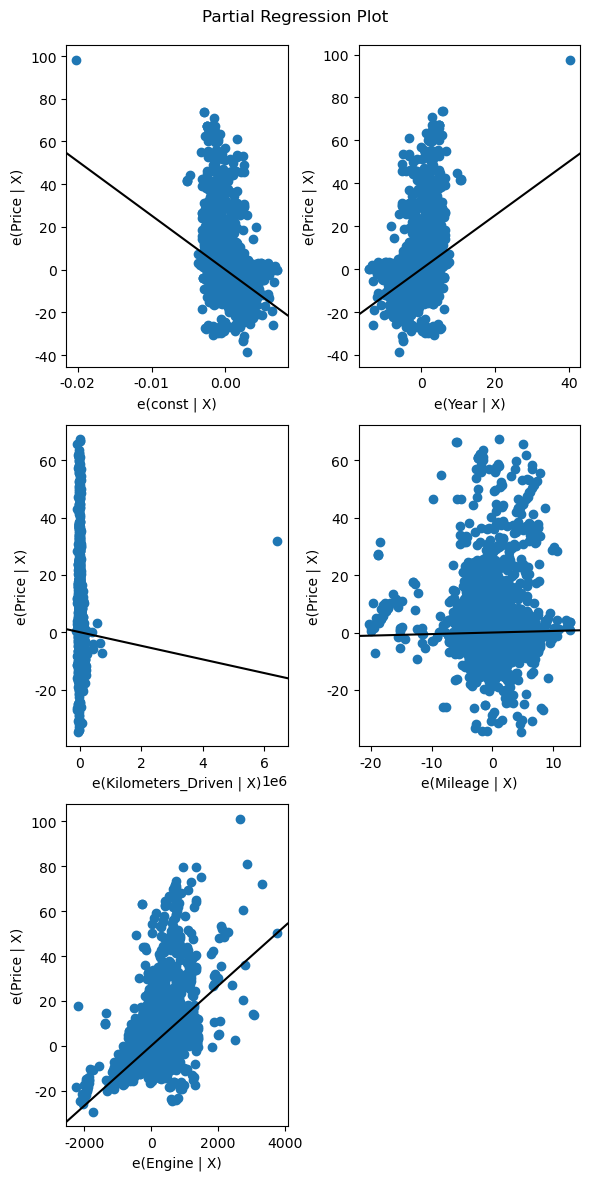

예측 결과: 0    -1.703388
1    12.037287
2     1.834904
3     3.781631
4    14.429667
5    -1.949801
6     7.994754
7    28.470435
8     9.735275
9     3.913930
dtype: float64


In [46]:
#5. 초기 10개의 데이터로 예측을 하라.

X = data1[['Year', 'Kilometers_Driven', 'Mileage', 'Engine']]
y = data1['Price']

X = sm.add_constant(X)

regression_model = sm.OLS(y, X)
regression_result = regression_model.fit()

fig = plt.figure(figsize=(6, 12))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()

X_test = X.head(10)
y_pred = regression_result.predict(X_test)

print("예측 결과:", y_pred)
